In [1]:
import pandas as pd

# Read the data

In [2]:
df = pd.read_csv('./dataset/IMDB-Movie-Data.csv', index_col = 'Rank')

In [3]:
df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Understand basic data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [5]:
df.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Some descriptions:
- The published year of these movies are between `2006` and `2016`
- Lowest rated score: 1.9, and highest rated score: 9.0
- Highest revenue: 936.6300 millions

In [6]:
df.iloc[10:15][['Title', 'Genre', 'Rating']]

,Title,Genre,Rating
Rank,,,
11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",7.5
12,Hidden Figures,"Biography,Drama,History",7.8
13,Rogue One,"Action,Adventure,Sci-Fi",7.9
14,Moana,"Animation,Adventure,Comedy",7.7
15,Colossal,"Action,Comedy,Drama",6.4


## Data selection
We want to retrieve the records. based on the following conditions:
- The movies must be published between 2010 to 2015
- The movies' rating must lower than `6.0`
- The revenue is belong to top 5%.

In [7]:
# data selection based on condition
df[
    ((df['Year'] >= 2010) & (df['Year'] <= 2015)) &
    (df['Rating'] < 6.0) &
    (df['Revenue (Millions)'] > df['Revenue (Millions)'].quantile(0.95))
]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


In [8]:
df.groupby('Director')[['Rating']].agg(['mean', 'count'])

Rating      
                      mean count
Director                        
Aamir Khan            8.50     1
Abdellatif Kechiche   7.80     1
Adam Leon             6.50     1
Adam McKay            7.00     4
Adam Shankman         6.30     2
...                    ...   ...
Xavier Dolan          7.55     2
Yimou Zhang           6.10     1
Yorgos Lanthimos      7.20     2
Zack Snyder           7.04     5
Zackary Adler         5.10     1

[644 rows x 2 columns]

In [9]:
df.groupby(['Genre', 'Year']).size().reset_index(name='MovieCount')

,Genre,Year,MovieCount
0,Action,2016,2
1,"Action,Adventure",2007,1
2,"Action,Adventure",2012,1
3,"Action,Adventure",2014,1
4,"Action,Adventure,Biography",2015,1
...,...,...,...
578,"Sci-Fi,Thriller",2008,1
579,Thriller,2007,1
580,Thriller,2014,1
581,Thriller,2016,7


In [10]:
df.groupby('Year').agg(
    {
        'Revenue (Millions)': 'sum',
        'Title': 'count',
        'Runtime (Minutes)': 'mean'
    }
).rename(
    columns={'Revenue (Millions)' : 'Total Revenue in Million', 'Title': 'Title Count', 'Runtime (Minutes)': 'Average Runtime in Minutes'}
)

,Total Revenue in Million,Title Count,Average Runtime in Minutes
Year,,,
2006,3624.46,44,120.840909
2007,4306.23,53,121.622642
2008,5053.22,52,110.826923
2009,5292.26,51,116.117647
2010,5989.65,60,111.133333
2011,5431.96,63,114.603175
2012,6910.29,64,119.109375
2013,7666.72,91,116.065934
2014,7997.40,98,114.489796


In [11]:
overall_avg = df['Rating'].mean()
directory_rating = df.groupby('Director').agg(
    {
        'Rating': 'mean',
        'Title': 'count'
    }
)
directory_ratings = directory_rating[(directory_rating['Rating'] > overall_avg) & (directory_rating['Title'] > 1)]
directory_ratings

,Rating,Title
Director,,
Adam McKay,7.000000,4
Alan Taylor,6.750000,2
Alejandro González Iñárritu,7.766667,3
Alfonso Cuarón,7.850000,2
Andrew Stanton,7.466667,3
...,...,...
Wes Anderson,7.900000,3
Woody Allen,7.020000,5
Xavier Dolan,7.550000,2


In [12]:
yearly_stats = df.groupby('Year').agg({
    'Title': 'count',
    'Rating': ['mean', 'min', 'max'],
    'Revenue (Millions)': 'sum'
}).rename(columns={'Title': 'MovieCount'})
yearly_stats

MovieCount    Rating           Revenue (Millions)
          count      mean  min  max                sum
Year                                                  
2006         44  7.125000  5.6  8.5            3624.46
2007         53  7.133962  4.7  8.5            4306.23
2008         52  6.784615  1.9  9.0            5053.22
2009         51  6.960784  2.7  8.4            5292.26
2010         60  6.826667  4.2  8.8            5989.65
2011         63  6.838095  4.9  8.6            5431.96
2012         64  6.925000  5.3  8.5            6910.29
2013         91  6.812088  4.3  8.2            7666.72
2014         98  6.837755  5.1  8.6            7997.40
2015        127  6.602362  3.5  8.3            8854.12
2016        297  6.436700  2.7  8.8           11211.65

## Fill missing Value

In [13]:
df.isnull().sum()

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [14]:
revenue_mean = df['Revenue (Millions)'].mean()
df['Revenue (Millions)'].fillna(revenue_mean, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16732\3323171587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Revenue (Millions)'].fillna(revenue_mean, inplace=True)


In [15]:
metascore_mean = df['Metascore'].mean()
df.fillna(
    {'Metascore': metascore_mean},
    inplace= True
)

In [16]:
def rating_group(rating):
    if rating >= 7.5:
        return 'Good'
    elif rating >= 6.0:
        return 'Average'
    else:
        return 'Bad'

In [17]:
df['Rating_category'] = df['Rating'].apply(rating_group)

In [18]:
df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category
Rank,,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Good
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Average
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Average
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Average
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0,Average
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0,Bad
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0,Average


# Time Series Data

In [19]:
df2 = pd.read_csv('./dataset/opsd_germany_daily.csv', index_col='Date', parse_dates=True)

In [20]:
print(df2.shape)
print(df2.dtypes)
df2.head()

(4383, 4)
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [21]:
df2.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [22]:
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month
df2['Weekday Name'] = df2.index.day_name()

In [23]:
df2.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2007-09-30,1129.808,NaN,NaN,NaN,2007,9,Sunday
2008-04-03,1491.993,NaN,NaN,NaN,2008,4,Thursday
2015-10-10,1214.974,198.301,72.662,270.963,2015,10,Saturday
2016-11-05,1299.408,182.205,18.560,200.765,2016,11,Saturday
2010-08-02,1273.612,14.921,NaN,NaN,2010,8,Monday


In [24]:
# Time based indexing
df2.loc['2014-01-20' : '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [25]:
# Partial string indexing
df2.loc['2012-02'][:5]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Date'>

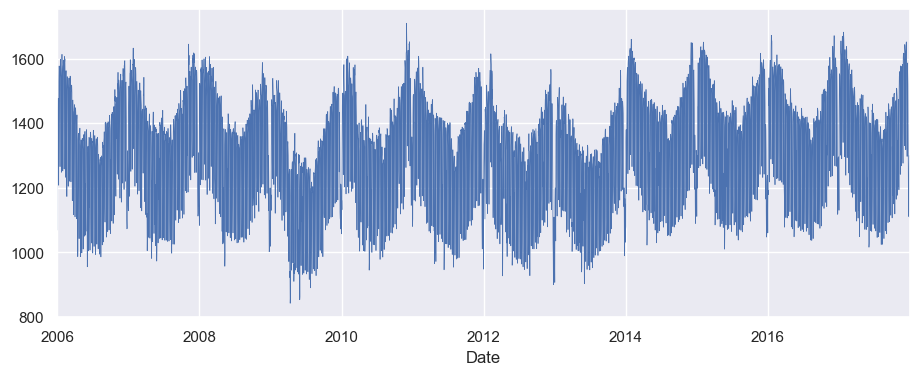

In [27]:
sns.set_theme(
    rc = {
        'figure.figsize':(11, 4)
    }
)
df2['Consumption'].plot(linewidth=0.5)

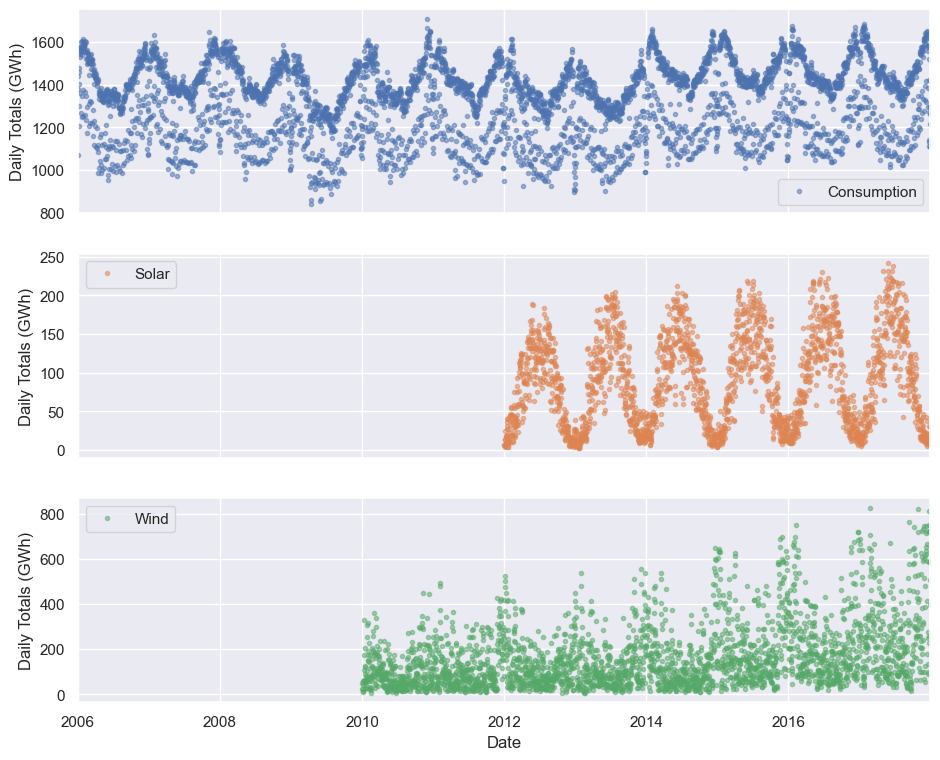

In [28]:
col_plots = ['Consumption', 'Solar', 'Wind']

axes = df2[col_plots].plot(
    marker = '.',
    alpha = 0.5,
    figsize=(11,9),
    subplots=True,
    linestyle='None'
)

for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

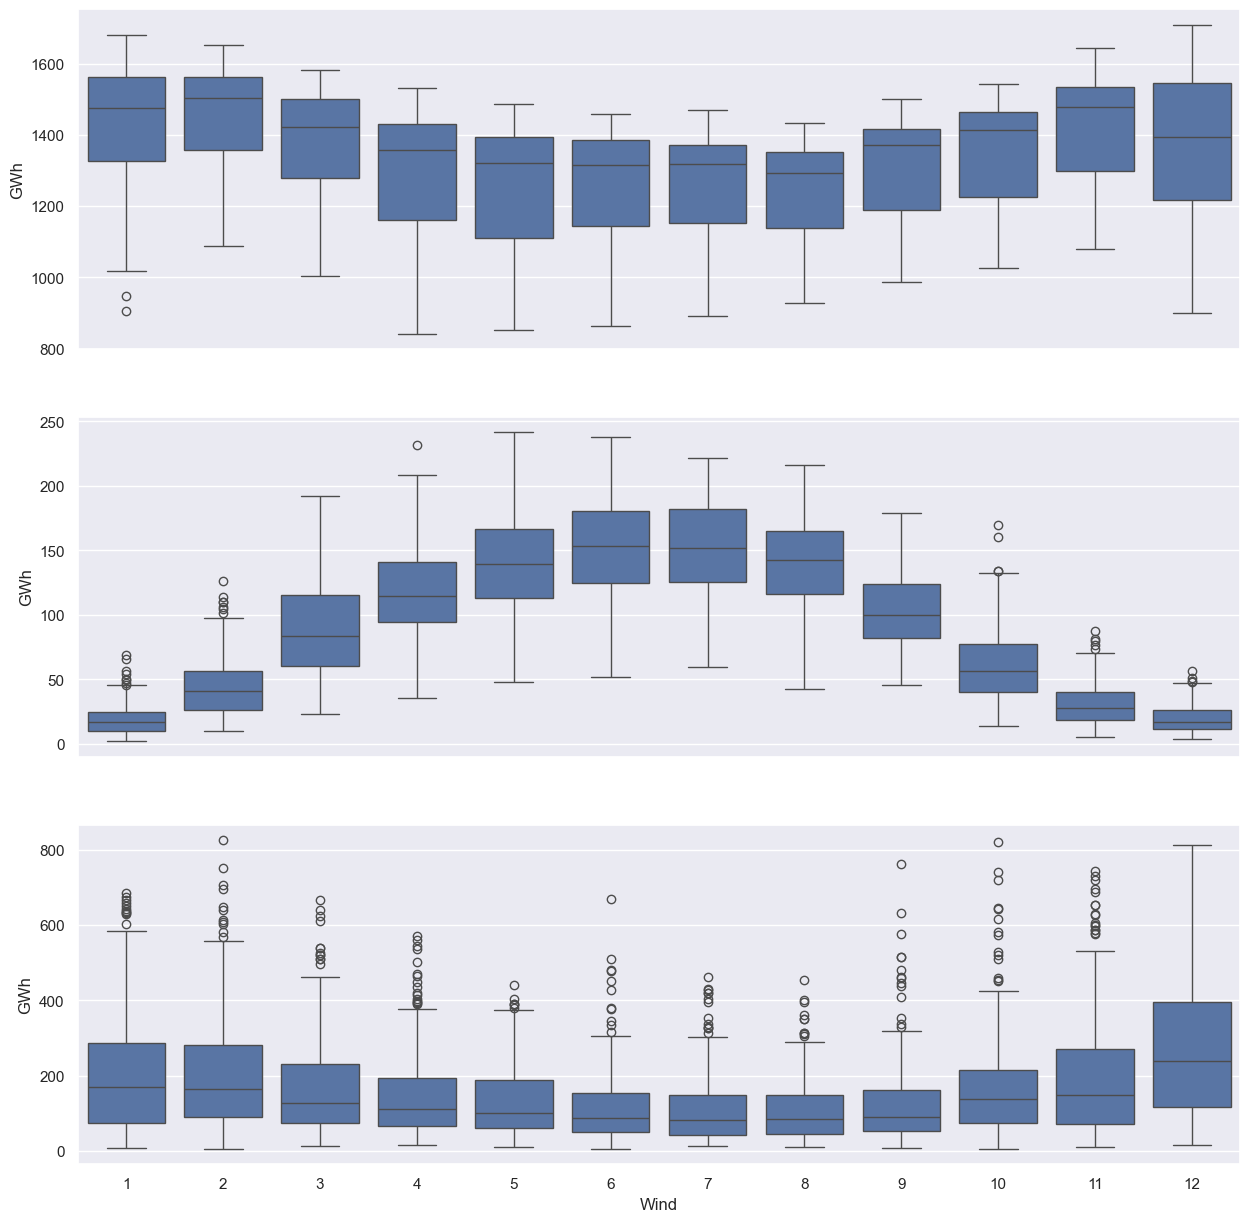

In [29]:
fig, axes = plt.subplots(
    3, 1, figsize=(15,15), sharex=True
)
for name, ax in zip(col_plots, axes):
    sns.boxplot(data=df2, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_xlabel(name)

In [30]:
pd.date_range(
    '1998-03-10',
    '1998-03-15',
    freq='D'
)

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [31]:
times_sample = pd.to_datetime(
    ['2013-02-03', '2013-02-06', '2013-02-08']
)
consum_sample = df2.loc[
    times_sample, ['Consumption']
].copy()

In [32]:
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [33]:
consum_freq = consum_sample.asfreq('D')
consum_freq['Consumption Forward Fill'] = consum_sample.asfreq('D', method='ffill')

In [34]:
consum_freq

,Consumption,Consumption Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [35]:
column_feature = df2.columns.tolist()[:4]
column_feature

['Consumption', 'Wind', 'Solar', 'Wind+Solar']

In [36]:
df2_weekly_mean = df2[column_feature].resample('W').mean()

In [37]:
df2_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [38]:
df2_weekly_mean.shape, df2.shape

((627, 4), (4383, 7))

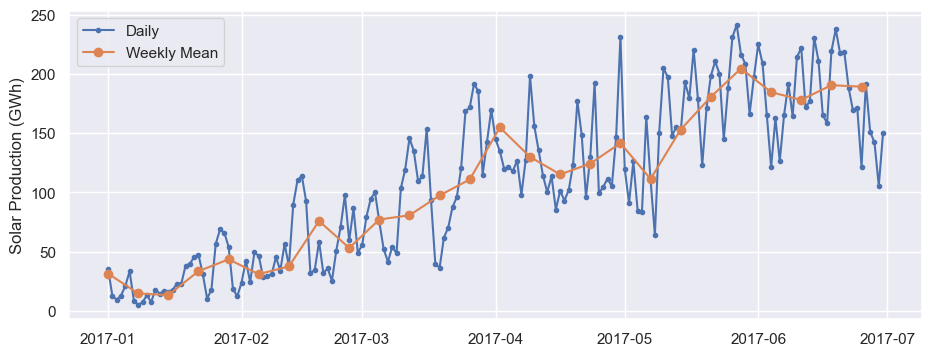

In [39]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(
    df2.loc[start:end, 'Solar'], marker = '.', linestyle='-', label='Daily'
)

ax.plot(
    df2_weekly_mean.loc[start:end, 'Solar'], marker='o', label='Weekly Mean'
)

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [40]:
opsd_annual = df2[column_feature].resample('YE').sum(min_count=0)
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']

In [41]:
opsd_annual

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2006,489068.53600,0.000,0.000,0.000,0.000000
2007,496631.84700,0.000,0.000,0.000,0.000000
2008,495570.87600,0.000,0.000,0.000,0.000000
2009,459737.42800,0.000,0.000,0.000,0.000000
2010,488588.70000,35911.777,0.000,0.000,0.000000
2011,484814.08600,44032.951,0.000,0.000,0.000000
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

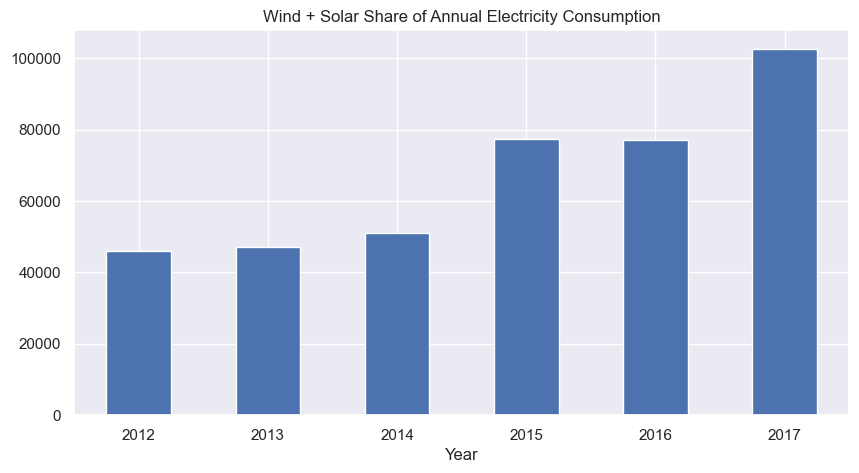

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = opsd_annual.loc[2012:,'Wind'].plot.bar()
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)

In [43]:
df_7d = df2[column_feature].rolling(
    7,
    center=True
).mean()
df_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


In [46]:
ops_7d = df2[column_feature].rolling(7, center=True).mean()
ops_365d = df2[column_feature].rolling(365, center=True, min_periods=360).mean()



Text(0.5, 0, 'Year')

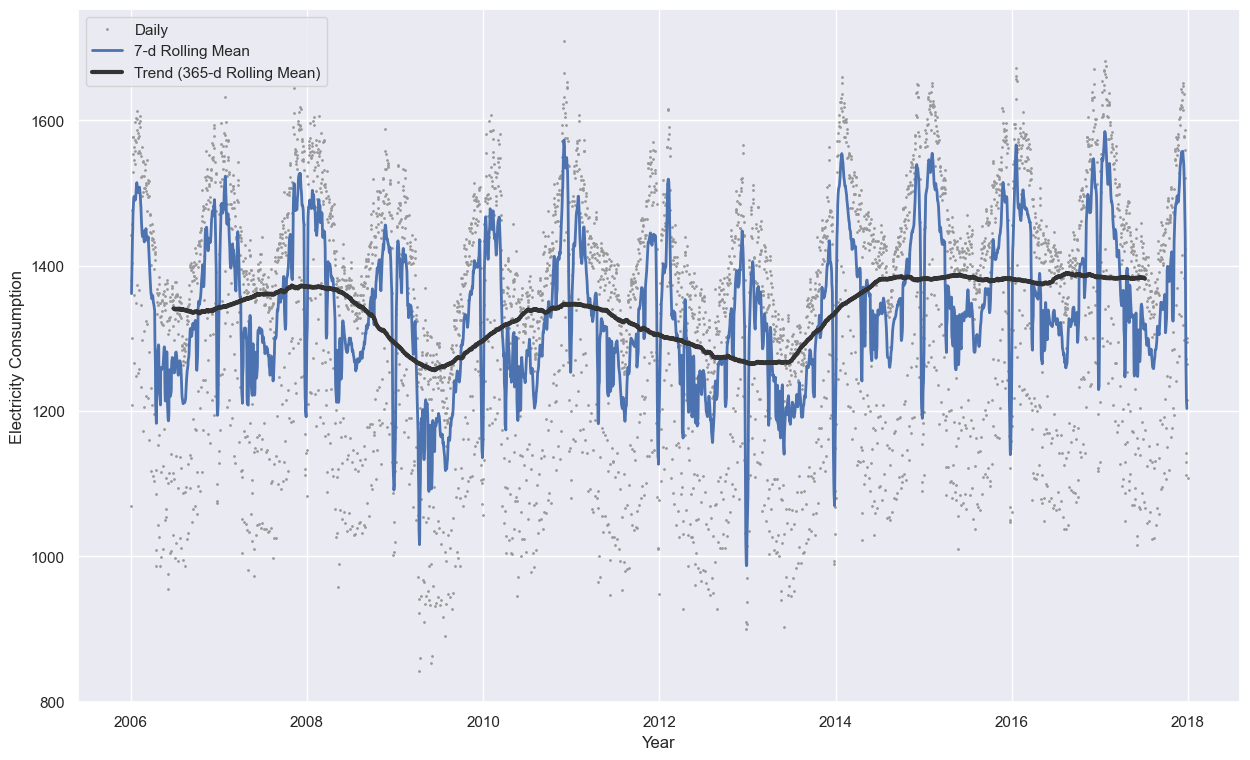

In [56]:
fig, ax =plt.subplots(figsize=(15,9))
ax.plot(df2['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(ops_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(ops_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
ax.legend()
ax.set_ylabel('Electricity Consumption')
ax.set_xlabel('Year')